In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('insurance_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
data = pd.read_csv("insurance_data.csv")
data.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

In [5]:
data.head() 


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [6]:
data.shape

(1340, 11)

In [7]:
data.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.isna().sum().sum()

0

In [10]:
data.duplicated().sum()

0

In [11]:
data = data.drop(['index','PatientID'], axis=1)
data.shape

(1332, 9)

In [12]:
data['diabetic'] = data['diabetic'].replace({'Yes': 'diabetic', 'No': 'non-diabetic'})
data['children'] = data['children'].replace({0 : 'none', 1 : 'one', 2:'two', 3:'three', 4:'four', 5:'five', 6:'six'})
data['smoker'] = data['smoker'].replace({'Yes': 'smoker', 'No': 'non-smoker'})

In [13]:
age_range = [13,28,46,58,61]
labels = ['Gen Z','Millennials', 'Gen X', 'Baby Boomers']
data['age_group'] = pd.cut(data['age'], age_range,labels=labels)
ageGroup = data[['age_group', 'claim']].groupby('age_group').mean().sort_values(by="claim", ascending=True)

In [14]:
bmi_range = [15.5,18.5,24.9,29.9,60]

labels = ['Underweight','Healthy Weight', 'Overweight', 'Obese']
data['bmi_group'] = pd.cut(data['bmi'], bmi_range, labels=labels)
bmiGroup = data[['bmi_group', 'claim']].groupby('bmi_group').mean().sort_values(by="claim", ascending=True)

In [15]:
bloodpressure_range = [71,120,129,139,148]
labels = ['Normal Blood Pressure', 'Elevated Blood Pressure', 'Hypertension Stage 1','Hypertension Stage 2']
data['bloodpressure_group'] = pd.cut(data['bloodpressure'], bloodpressure_range, labels = labels)
bloodpressureGroup = data[['bloodpressure_group', 'claim']].groupby('bloodpressure_group').mean().sort_values(by="claim", ascending=True)

In [16]:
data


,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,age_group,bmi_group,bloodpressure_group
0,39.0,male,23.2,91,diabetic,none,non-smoker,southeast,1121.87,Millennials,Healthy Weight,Normal Blood Pressure
1,24.0,male,30.1,87,non-diabetic,none,non-smoker,southeast,1131.51,Gen Z,Obese,Normal Blood Pressure
7,19.0,male,41.1,100,non-diabetic,none,non-smoker,northwest,1146.80,Gen Z,Obese,Normal Blood Pressure
8,20.0,male,43.0,86,non-diabetic,none,non-smoker,northwest,1149.40,Gen Z,Obese,Normal Blood Pressure
9,30.0,male,53.1,97,non-diabetic,none,non-smoker,northwest,1163.46,Millennials,Obese,Normal Blood Pressure
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,44.0,female,35.5,88,diabetic,none,smoker,northwest,55135.40,Millennials,Obese,Normal Blood Pressure
1336,59.0,female,38.1,120,non-diabetic,one,smoker,northeast,58571.07,Baby Boomers,Obese,Normal Blood Pressure
1337,30.0,male,34.5,91,diabetic,three,smoker,northwest,60021.40,Millennials,Obese,Normal Blood Pressure
1338,37.0,male,30.4,106,non-diabetic,none,smoker,southeast,62592.87,Millennials,Obese,Normal Blood Pressure


<Axes: title={'center': 'Claims per Region'}, ylabel='region'>

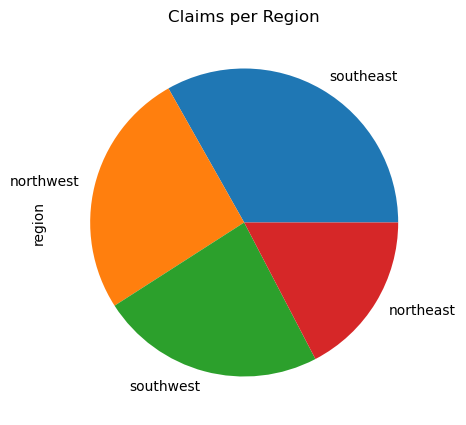

In [17]:
plt.figure(figsize = (10,5))
plt.title("Claims by Region")
data['region'].value_counts().plot(kind='pie', title = "Claims per Region")

<Axes: title={'center': 'Claims per Age Group'}, ylabel='age_group'>

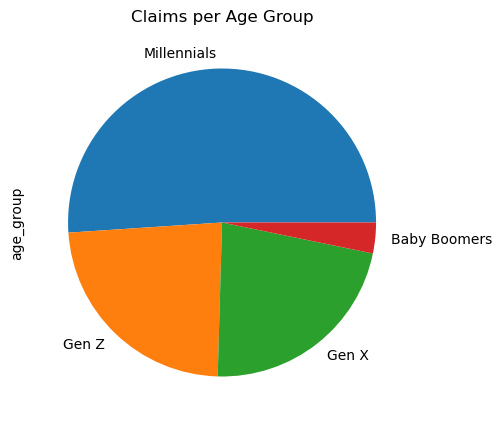

In [18]:
plt.figure(figsize = (10,5))

data['age_group'].value_counts().plot(kind='pie', title = "Claims per Age Group")

<Axes: title={'center': 'BMI Ranges'}, ylabel='bmi_group'>

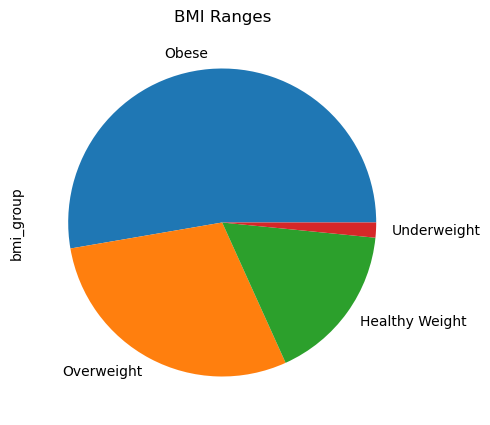

In [19]:
plt.figure(figsize = (10,5))
data['bmi_group'].value_counts().plot(kind='pie', title = "BMI Ranges")

<Axes: title={'center': 'BMI and Claim Amount'}, xlabel='bmi', ylabel='claim'>

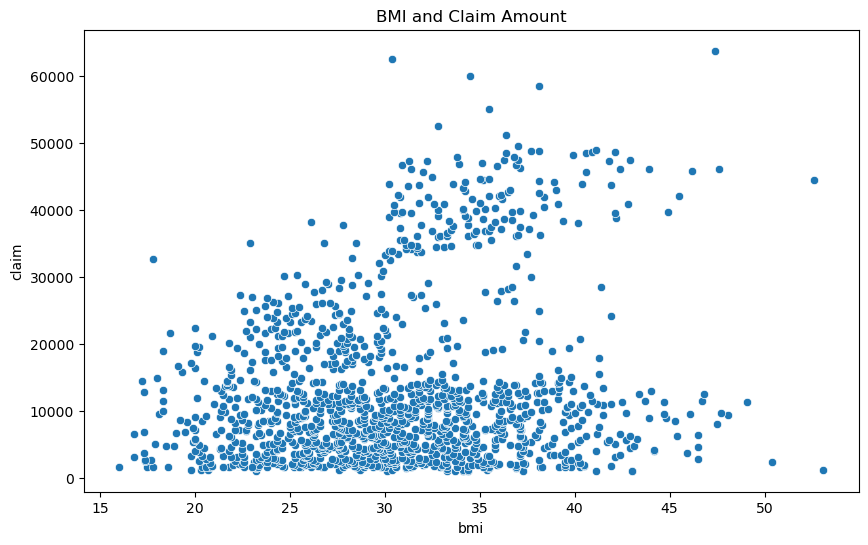

In [20]:
plt.figure(figsize=(10,6))

plt.title("BMI and Claim Amount")

sns.scatterplot(x=df['bmi'], y=df['claim'])

Text(0, 0.5, 'Claim Amounts')

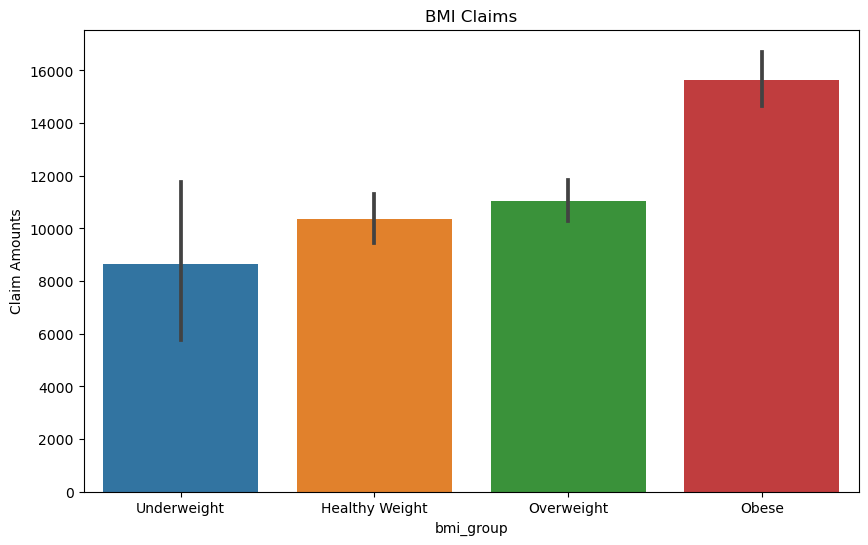

In [22]:
plt.figure(figsize=(10,6))

plt.title("BMI Claims")

sns.barplot(x=data.bmi_group, y=data['claim'])

plt.ylabel("Claim Amounts")

<Axes: title={'center': 'Correlation between Blood Pressure and Generation'}, xlabel='age_group', ylabel='count'>

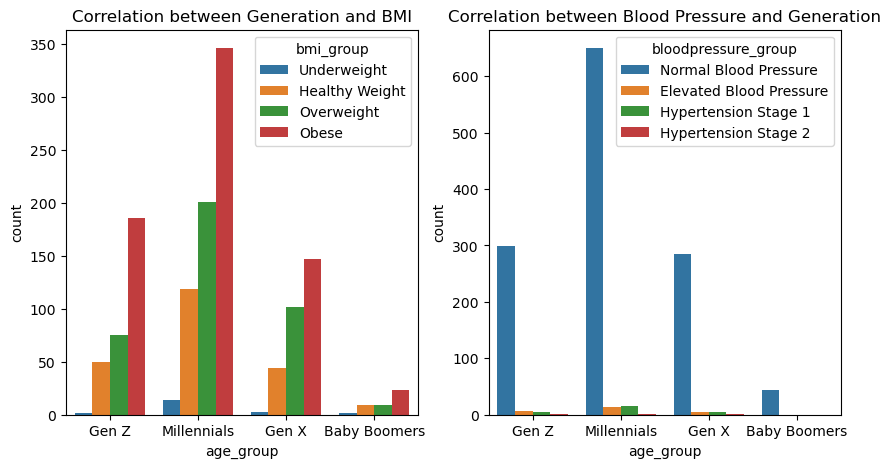

In [23]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)

plt.title("Correlation between Generation and BMI")
sns.countplot(x ='age_group', hue = 'bmi_group', data = data)


plt.subplot(1,2,2)

plt.title("Correlation between Blood Pressure and Generation")
sns.countplot(x = 'age_group', hue = 'bloodpressure_group', data = data)

<Axes: xlabel='age_group', ylabel='count'>

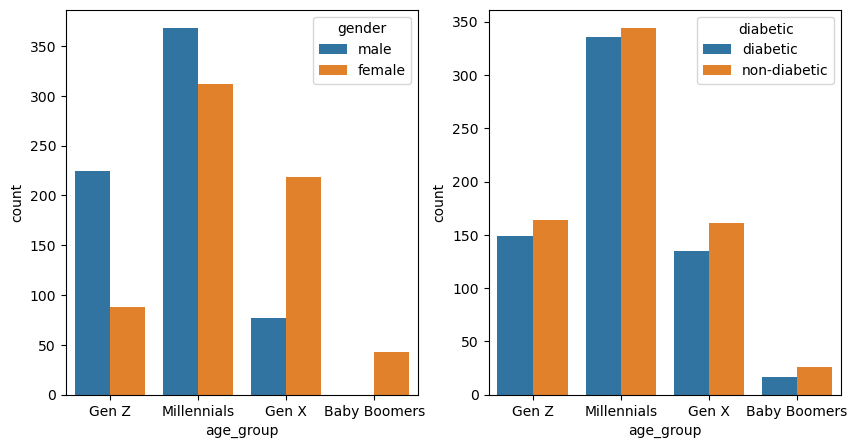

In [24]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'age_group', hue = 'gender', data = data)

plt.subplot(1,2,2)
sns.countplot(x ='age_group', hue = 'diabetic', data = data)

<Axes: xlabel='age_group', ylabel='count'>

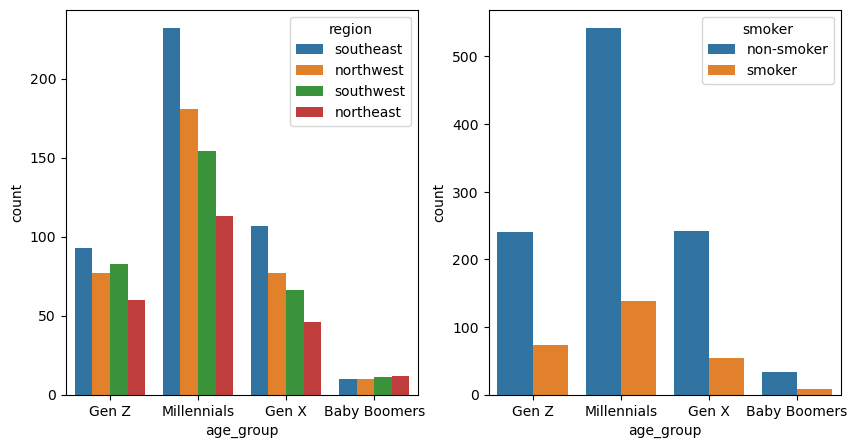

In [25]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x = 'age_group', hue = 'region', data = data)

plt.subplot(1,2,2)
sns.countplot( x = 'age_group', hue = 'smoker', data = data)

<Axes: title={'center': 'Correlation of Generations and Children'}, xlabel='age_group', ylabel='count'>

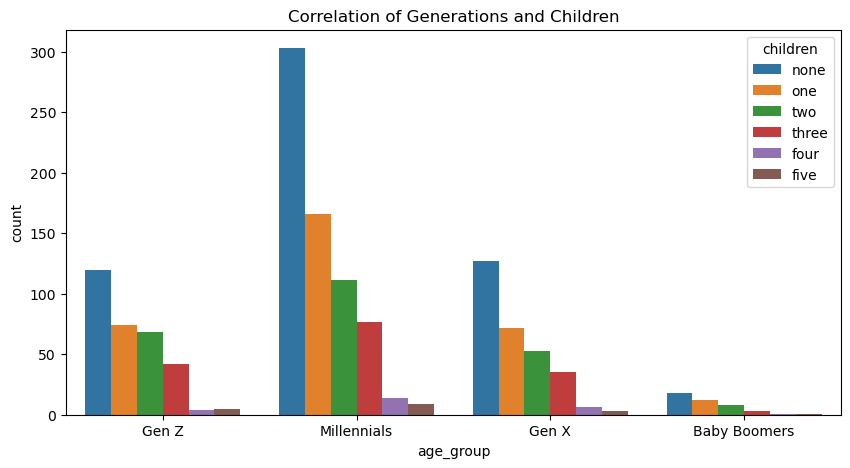

In [26]:
plt.figure(figsize = (10,5))
 
plt.title("Correlation of Generations and Children")

sns.countplot( x = 'age_group', hue = 'children', data = data)

Text(0, 0.5, 'Claim Amount')

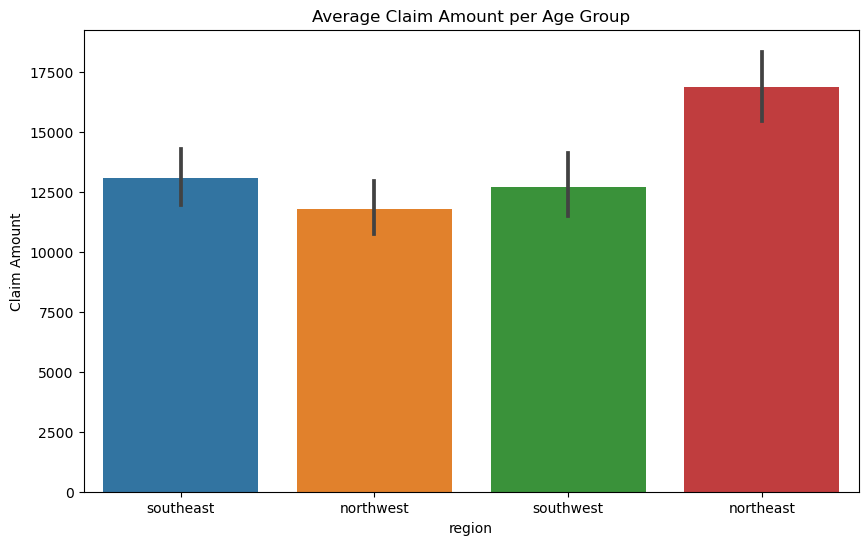

In [27]:
plt.figure(figsize=(10,6))

plt.title("Average Claim Amount per Age Group")

sns.barplot(x=df.region, y=data['claim'])

plt.ylabel("Claim Amount")

Text(0, 0.5, 'Region')

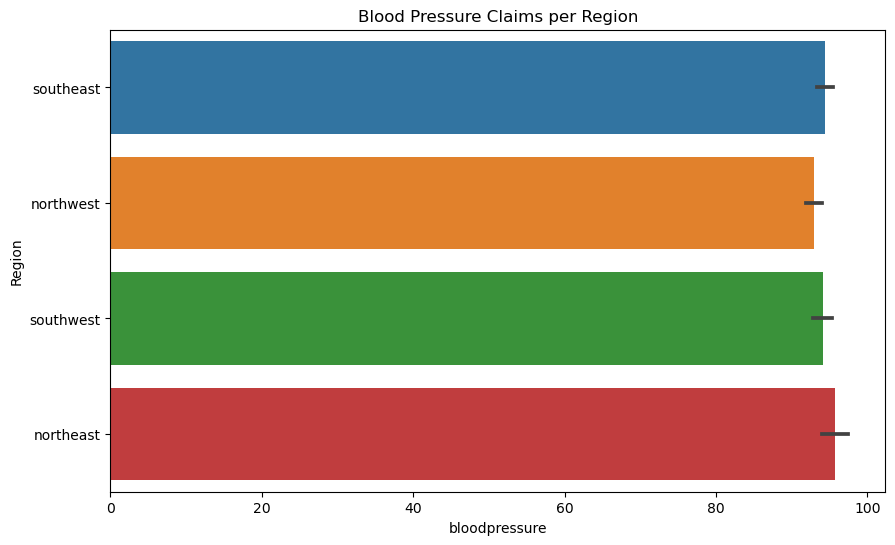

In [28]:
plt.figure(figsize=(10,6))

plt.title("Blood Pressure Claims per Region")

sns.barplot(x=df.bloodpressure, y=data['region'])

plt.ylabel("Region")